In [27]:
from qwak.qwak import QWAK
import networkx as nx
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.special as sp
from scipy.linalg import expm
import sympy as simp
from utils.plotTools import plot_data


In [28]:
def write_nested_list_to_file(file_path, nested_lst):
    """
    Write a nested list of elements to a text file.
    
    :param file_path: the file path where to write the nested list
    :param nested_lst: the nested list of elements to write
    """
    with open(file_path, 'w') as f:
        for lst in nested_lst:
            for item in lst:
                f.write(f"{item} ")
            f.write("\n")

def load_nested_list_from_file(file_path):
    """
    Load a nested list of float elements from a text file.
    
    :param file_path: the file path to load the nested list from
    :return: the nested list of float elements loaded from the file
    """
    nested_lst = []
    with open(file_path, 'r') as f:
        for line in f:
            lst = [float(item) for item in line.strip().split()]
            nested_lst.append(lst)
    return nested_lst

In [29]:
N = 100
pThresh = math.log(N,3/2)/N
print(pThresh)

t = np.pi/2 * sqrt(N)

#procurar funcao que testa se o grafo e conexo

timeList = [ x for x in np.linspace(0,t,50)]

markedElements = [(N//2,-1)]

# print(t)
probDistList = []

for p in np.linspace(pThresh/10, pThresh ,2):
    graph = nx.erdos_renyi_graph(N,p)
    if p>1:
        gamma = 1/N
    else:
        gamma = 1/(N*p)
    initCond = list(range(0,len(graph)))
    qw = QWAK(graph=graph,gamma=gamma,markedElements=markedElements,laplacian=False)
    qw.runWalk(time=t,initStateList=initCond)
    probDistList.append(copy.deepcopy(qw.getProbVec()))

# for prob in probDistList:
#     plt.plot(prob)
#     print(max(prob))

0.11357747174535147


bla0
bla1


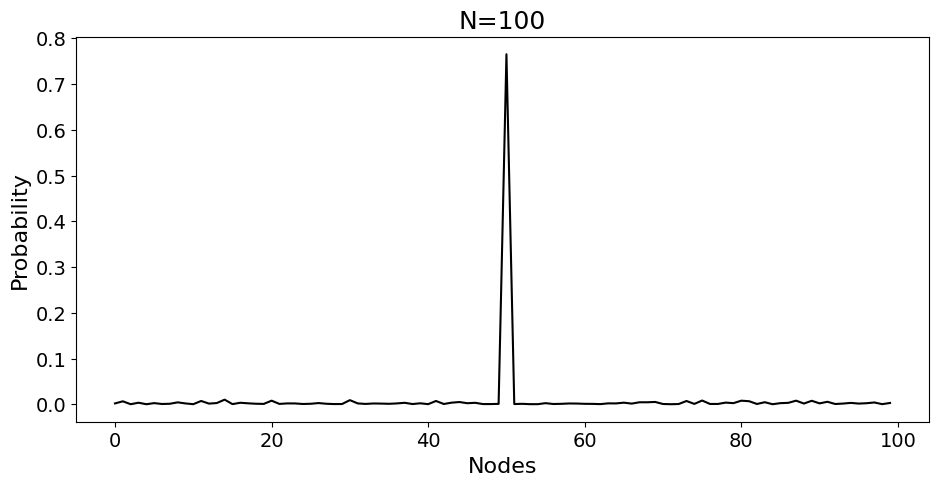

In [30]:
N = 100
pThresh = math.log(N,3/2)/N

t = np.pi/2 * sqrt(N)

timeList = [ x for x in np.linspace(t-t/3,t,5)]
markedElements = [(N//2,-1)]
probDistList = []

graph = nx.erdos_renyi_graph(N,pThresh)
if pThresh>1:
    gamma = 1/N
else:
    gamma = 1/(N*pThresh)
initCond = list(range(0,len(graph)))
qw = QWAK(graph=graph,gamma=gamma,markedElements=markedElements,laplacian=False)
qw.runWalk(time=t,initStateList=initCond)

params = {
    'font_size' : 14,
    'figsize': (11, 5),
    'plot_title' : f'N={N}',
    'x_label' : 'Nodes',
    'y_label' : "Probability",
    'legend_labels' : None,
    'legend_loc': "best",
    'legend_title' : r'$\alpha$',
    'legend_ncol' : 3,
    'color_list' : ['#000000'],
    'line_style_list' : ['-'],
    # 'save_path' : f'Output/OrientedDynamics/orientedDynamics_N{N}_NWALKS{len(alphaList)}_Alphas{str([round(a, 2) for a in alphaList]).replace(", ", "-").replace("[", "").replace("]", "")}_TMAX{round(t)}.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None
}
plot_data(x_value_matrix = list(range(0,N)), y_value_matrix = qw.getProbVec(),**params)

# Heatmap

In [31]:
def searchProbStepsPlotting2(qwak: QWAK, probDistList):
    """Plots the probability of finding the target as a function of the number of steps.

    Parameters
    ----------
    qwak : QWAK
        QWAK object containing the results of the simulation.
    """
    markedProbability = 0
    markedProbDistList = []
    markdElements = qwak.getMarkedElements()
    probDistList = probDistList
    if probDistList == []:
        raise EmptyProbDistList(
            "The probability distribution list is empty.")
    for probDist in probDistList:
        for element in markdElements:
            markedProbability += probDist.searchNodeProbability(
                element[0])
        markedProbDistList.append(markedProbability)
        markedProbability = 0
    return markedProbDistList

def multiple_erdos_renyi_qwak(N,pList,timeList,numberOfWalks,markedElements):
    markedProbMatrix = []
    markedProbList = [0]*len(timeList)
    probDistList = []
    pValMatrix = []
    sampleCounter = 1
    for pVal in pList:
        print(f'PVAL {round(pVal, 4)}/{max(pList)} \t Sample {sampleCounter}/{len(pList)}')
        sampleCounter += 1
        for i in range(numberOfWalks):
            graph = nx.erdos_renyi_graph(N,pVal)
            if pVal>1:
                gamma = 1/N
            else:
                gamma = 1/(N*pVal)
            initCond = list(range(0,len(graph)))
            qw = QWAK(graph=graph,gamma=gamma,markedElements=markedElements,laplacian=False)
            for t in timeList:
                # print(f'NWALK {i} \t PVAL {round(pVal,4)}/{max(pList)} \tTIME {t} /{max(timeList)}')
                qw.runWalk(time=t,initStateList=initCond)
                probDistList.append(copy.deepcopy(qw.getProbDist()))
            markedElementList = searchProbStepsPlotting2(qw,probDistList)
            markedProbList = [x + y for x, y in zip(markedProbList, markedElementList )]
            probDistList = []
        pValMatrix.append([pVal]*len(timeList))
        timeMatrix = [timeList]*len(timeList)
        markedProbListAvg = [x/numberOfWalks for x in markedProbList]
        markedProbMatrix.append(markedProbListAvg)
        markedProbList = [0]*len(timeList)

    return pValMatrix,timeMatrix,markedProbMatrix

In [32]:
n = 9
N = 2**n
p = math.log(N,3/2)/N
pMax = 0.5
samples = 200
numberOfWalks = 40
t = np.pi/2 * sqrt(N)
markedElements = [(0,-1)]

pAux = p/(samples)
# pList = np.concatenate([np.linspace(p/10, p-pAux, samples//3),np.linspace(p,p+pAux,samples//3),np.linspace(p+pAux+(pAux/samples), 1.1,samples//3)])
pList = np.linspace(pAux, pMax, samples)
graphList = [nx.erdos_renyi_graph(N,pVal) for pVal in pList]


tAux = t/(samples)
# timeList = np.concatenate([np.linspace(0, t/2 - tAux, samples//3),np.linspace(t/2,t+tAux,samples//3),np.linspace(t,2*t,samples//3)])
timeList = np.linspace(0, 2*t, samples)

In [33]:
time_file = f'Datasets/ERSearch/timeMatrix_N{N}_NGRAPHS{numberOfWalks}_S{samples}_PMAX{pMax}.txt'
pval_file = f'Datasets/ERSearch/pValMatrix_N{N}_NGRAPHS{numberOfWalks}_S{samples}_PMAX{pMax}.txt'
marked_prob_file = f'Datasets/ERSearch/markedProbMatrix_N{N}_NGRAPHS{numberOfWalks}_S{samples}_PMAX{pMax}.txt'

if os.path.exists(time_file) and os.path.exists(pval_file) and os.path.exists(marked_prob_file):
    x = load_nested_list_from_file(pval_file)
    y = load_nested_list_from_file(time_file)
    z = load_nested_list_from_file(marked_prob_file)
    print('File exists!')
else:
    print('File Doesnt Exist!')
    # x,y,z = multiple_erdos_renyi_qwak(N,pList,timeList,numberOfWalks,markedElements)
    x,y,z = multiple_erdos_renyi_qwak2(N,graphList,pList,timeList,numberOfWalks,markedElements)
    # x,y,z = multiple_erdos_renyi_qwak3(N,graphList,pList,timeList,numberOfWalks,markedElements)
    if not os.path.exists(pval_file):
        write_nested_list_to_file(pval_file, x)
    if not os.path.exists(time_file):
        write_nested_list_to_file(time_file, y)
    if not os.path.exists(marked_prob_file):
        write_nested_list_to_file(marked_prob_file, z)

File exists!


In [34]:
x = load_nested_list_from_file(pval_file)
y = load_nested_list_from_file(time_file)
z = load_nested_list_from_file(marked_prob_file)

0.03005000316828729
0.017578125
35.54306350526693


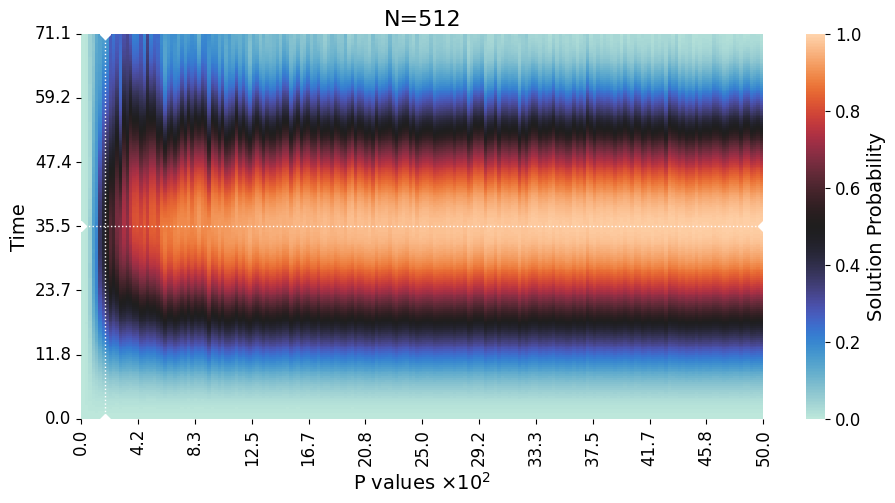

In [35]:
def plot_heatmap(p_values, t_values, prob_values, x_num_ticks=5, y_num_ticks=5, x_round_val=3, y_round_val=3, filepath=None,
                 N=None, xlabel=None, ylabel=None, cbar_label=None, font_size=12, figsize=(8, 6), cmap='coolwarm',
                 x_vline_value=None, y_hline_value=None):
    flat_p = [item for sublist in p_values for item in sublist]
    flat_t = [item for sublist in t_values for item in sublist]
    flat_prob = [item for sublist in prob_values for item in sublist]
    data = {'p': flat_p, 't': flat_t, 'prob': flat_prob}
    df = pd.DataFrame(data)
    pivot = df.pivot('t', 'p', 'prob')

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(pivot, cmap=cmap, vmin=0, vmax=1, cbar_kws={'label': cbar_label}, linewidths=0)

    # set customizations
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=font_size)
    cbar.ax.set_ylabel(cbar_label, fontsize=font_size + 2)

    # generate tick labels based on p and t values
    num_p_ticks = min(x_num_ticks, len(p_values[0]))
    num_t_ticks = min(y_num_ticks, len(t_values[0]))
    p_tick_labels = np.round(np.linspace(100*min(flat_p), 100*max(flat_p), num_p_ticks), x_round_val)
    t_tick_labels = np.round(np.linspace(min(flat_t), max(flat_t), num_t_ticks), y_round_val)

    # set x and y tick labels
    ax.set_xticks(np.linspace(0, len(p_values[0]), num_p_ticks))
    ax.set_yticks(np.linspace(0, len(t_values[0]), num_t_ticks))
    ax.set_xticklabels(p_tick_labels)
    ax.set_yticklabels(t_tick_labels)

    # find closest x and y tick values
    if x_vline_value is not None:
        x_tick_value = (x_vline_value - min(flat_p)) / (max(flat_p) - min(flat_p)) * len(p_values[0])
        ax.axvline(x=x_tick_value, linestyle=':',marker='D',markersize=5, linewidth=1, color='white')
    if y_hline_value is not None:
        y_tick_value = (y_hline_value - min(flat_t)) / (max(flat_t) - min(flat_t)) * len(t_values[0])
        ax.axhline(y=y_tick_value, linestyle=':',marker='D',markersize=5, linewidth=1, color='white')

    # add title to the plot if N is provided
    if N is not None:
        plt.title(f'N={N}', fontsize=font_size + 4)

    # add x and y axis labels
    if xlabel is not None:
        ax.set_xlabel(xlabel, fontsize=font_size + 2)
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=font_size + 2)

    if filepath is not None:
        plt.savefig(filepath, bbox_inches='tight')
        plt.show()
    else:
        plt.show()


newP = math.log(N,2)/N

x_num_ticks =13
y_num_ticks = 7
x_round_val = 1
y_round_val = 1

xlabel = r'P values $\times 10^2$'
ylabel = 'Time'
cbar_label = 'Solution Probability'

font_size = 12
figsize = (11, 5)
# colormap = "magma"
# colormap = "vlag"
# colormap = sns.diverging_palette(220, 20, as_cmap=True)
colormap = sns.color_palette("icefire", as_cmap=True)
x_vline_value = newP
# x_vline_value = p
y_vline_value = t

print(p)
print(newP)
print(t)
heatMapPlotFile = f'Output/ERSearch/heatMapPlot_N{N}_NGRAPHS{numberOfWalks}_S{samples}_PMAX{pMax}.png'
plot_heatmap(p_values=x, t_values=y, prob_values=z, x_num_ticks=x_num_ticks, y_num_ticks=y_num_ticks,
             x_round_val=x_round_val, y_round_val=y_round_val, filepath=heatMapPlotFile,
             N=N, xlabel=xlabel, ylabel=ylabel, cbar_label=cbar_label, font_size=font_size, figsize=figsize,
             cmap=colormap,
             x_vline_value=x_vline_value, y_hline_value=y_vline_value)